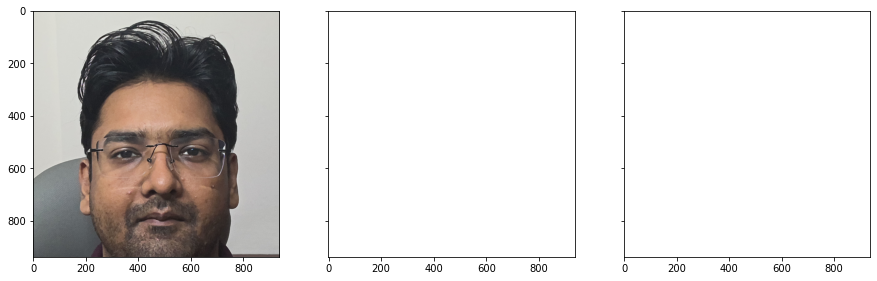

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sepfir2d

im = plt.imread(r"C:\Users\arpit\Pictures\demo.png").copy() # load image
h = [1/16, 4/16, 6/16, 4/16, 1/16] #blur filter
N= 3 # number of pyramid levels

P = []
P.append(im) # first pyramid level
for k in range(1,N): # build pyramid
    im2 = np.zeros(im.shape)
    for z in range(3):
        im2[:,:,z] = sepfir2d(im[:,:,z], h, h) # blur each color channel
    im2 = im2[0:-1:2, 0:-1:2,:] # down-sample
    im = im2
    P.append(im2)

# display pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72, sharex=True, sharey=True)
for k in range(N-1, -1, -1):
    ax[k].imshow(P[k])


Original image shape: (937, 937, 4), dtype: float32
Layer 1, Shape: (468, 468, 3), dtype: float32
Layer 2, Shape: (234, 234, 3), dtype: float32


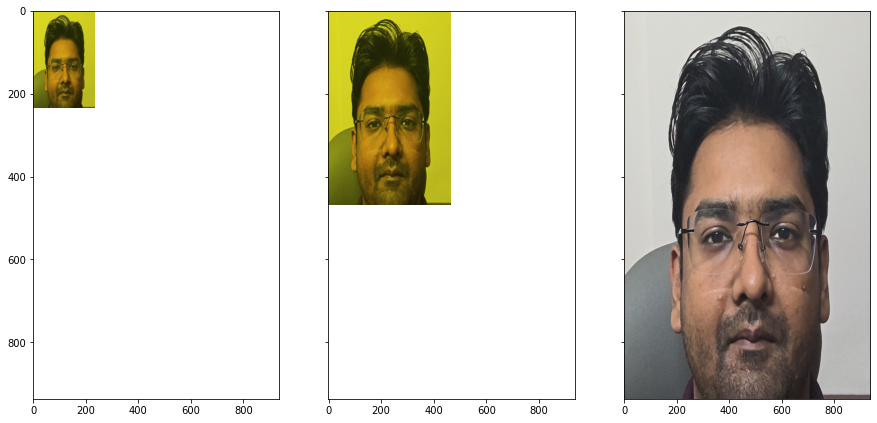

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sepfir2d
from skimage.transform import resize  # Using a more robust downsampling method

# Load image and check properties
im = plt.imread(r"C:\Users\arpit\Pictures\demo.png").copy()
print(f"Original image shape: {im.shape}, dtype: {im.dtype}")

h = [1/16, 4/16, 6/16, 4/16, 1/16]  # Blur filter
N = 3  # Number of pyramid levels

P = [im]  # Start with the original image

# Build the pyramid
for k in range(1, N):
    im2 = np.zeros(im.shape, dtype=np.float32)  # Ensure the data type supports the operations
    for z in range(3):  # Assuming the image is RGB
        im2[:, :, z] = sepfir2d(im[:, :, z], h, h)

    # More robust downsampling using resize
    im2 = resize(im2, (im.shape[0] // 2, im.shape[1] // 2, 3), anti_aliasing=True)
    
    print(f"Layer {k}, Shape: {im2.shape}, dtype: {im2.dtype}")  # Check each layer's properties

    # Append the processed image to the pyramid
    im = im2
    P.append(im2)

# Display the pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15, 7), dpi=72, sharex=True, sharey=True)
for k in range(N):
    ax[k].imshow(P[N - 1 - k], aspect='auto')  # Display in reverse order
plt.show()


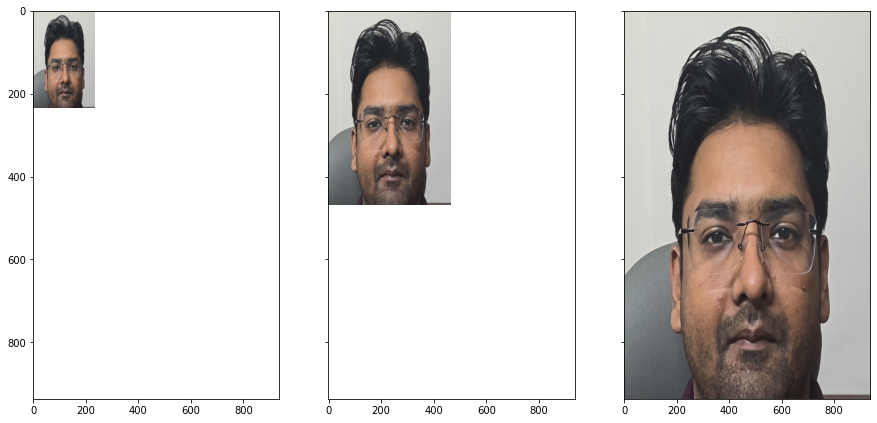

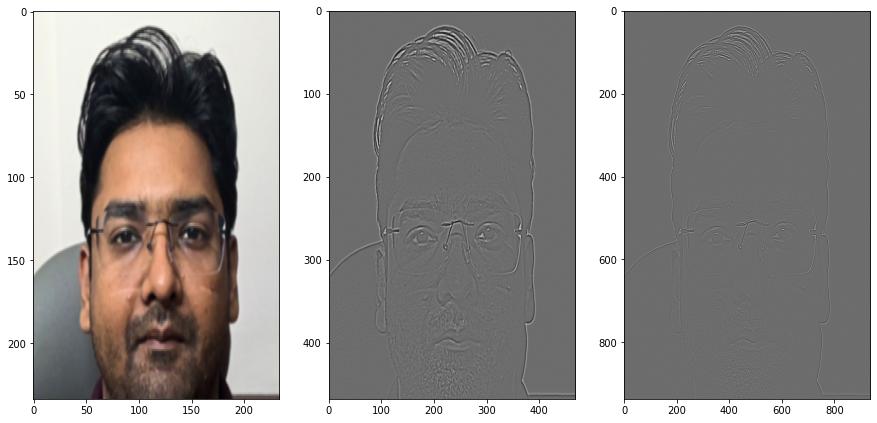

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sepfir2d
from skimage.transform import resize, rescale

# Load image
im = plt.imread(r"C:\Users\arpit\Pictures\demo.png").copy()

if im.shape[-1] == 4:  # Check if the image has an alpha channel
    im = im[..., :3]  # Keep only RGB channels
if im.dtype == np.uint8:
    im = im / 255.0  # Normalize if in uint8

h = [1/16, 4/16, 6/16, 4/16, 1/16]  # Blur filter
N = 3  # Number of pyramid levels

P = [im]  # Gaussian Pyramid
L = []  # Laplacian Pyramid

# Build the Gaussian pyramid
for k in range(1, N):
    im2 = np.zeros(im.shape, dtype=np.float32)
    for z in range(im.shape[-1]):  # Handle either RGB or RGBA
        im2[:, :, z] = np.clip(sepfir2d(im[:, :, z], h, h), 0, 1)

    # Downsample using resize
    im2 = resize(im2, (im.shape[0] // 2, im.shape[1] // 2, im.shape[-1]), anti_aliasing=True)

    # Append the processed image to the Gaussian pyramid
    P.append(im2)
    im = im2

# Build the Laplacian pyramid by subtracting successive Gaussian levels
for i in range(len(P) - 1):
    expanded = resize(P[i + 1], P[i].shape[:2], order=3, mode='reflect', anti_aliasing=True)
    L.append(P[i] - expanded)
L.append(P[-1])  # The last level is simply appended

# Display the Gaussian Pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15, 7), dpi=72, sharex=True, sharey=True)
for k in range(N):
    ax[k].imshow(P[N - 1 - k], aspect='auto')  # Display in reverse order
plt.show()

# Display the Laplacian Pyramid with scaling
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15, 7), dpi=72)
for k in range(N):
    # Normalize the Laplacian image to [0, 1] before displaying
    lap_img = L[N - 1 - k]
    lap_img_normalized = (lap_img - np.min(lap_img)) / (np.max(lap_img) - np.min(lap_img))
    ax[k].imshow(lap_img_normalized, aspect='auto', cmap='gray')
    
plt.show()

